In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
corr_matrix = df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [7]:
train_X = df.drop(["Cabin", "Survived"], axis=1)
train_y = df["Survived"]

In [8]:
train_X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [10]:
train_X["Embarked"].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [11]:
train_X["Embarked"].fillna("N", inplace=True)

In [12]:
train_X["Embarked"].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [13]:
train_X["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train_X["Age"].dtype

dtype('float64')

In [15]:
train_X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [16]:
train_X["Sex"] = train_X["Sex"].astype('category', copy=False)

In [17]:
train_X["Sex"].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
sex = train_X[["Sex"]]
ordinal_encoder = OrdinalEncoder(categories = [["male","female"]]) # male:0 and female:1
encoded_sex = ordinal_encoder.fit_transform(sex)
encoded_sex[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [19]:
sex[:10]

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male
8,female
9,female


In [20]:
ordinal_encoder.categories_

[array(['male', 'female'], dtype=object)]

In [21]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
encoded_sex = one_hot_encoder.fit_transform(sex)
encoded_sex.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [22]:
one_hot_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [23]:
encoded_embarked = one_hot_encoder.fit_transform(train_X[["Embarked"]])
encoded_embarked.toarray()

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [24]:
train_X["Fare"].isna().value_counts()

False    891
Name: Fare, dtype: int64

In [25]:
train_X["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [26]:
train_X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
train_y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
train_X.drop("Name", axis=1, inplace=True)

In [29]:
train_X["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [30]:
ticket = train_X["Ticket"].copy()

In [31]:
"Keeping only last integer part"
for i in range(len(ticket)):
    ticket[i] = ticket[i].split()[-1]

In [32]:
ticket

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: object

In [33]:
ticket.isna().value_counts()

False    891
Name: Ticket, dtype: int64

In [34]:
len(ticket.unique()), len(train_X["Ticket"].unique())

(679, 681)

In [35]:
num_X = train_X.drop(["Ticket", "Sex", "Embarked"], axis=1)

In [36]:
num_X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [37]:
from sklearn.impute import SimpleImputer
simp = SimpleImputer(strategy='median')
train_X.drop("PassengerId", axis=1, inplace=True)
simp.fit_transform(num_X)

array([[  1.    ,   3.    ,  22.    ,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,  38.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,   3.    ,  26.    ,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   3.    ,  28.    ,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,  26.    ,   0.    ,   0.    ,  30.    ],
       [891.    ,   3.    ,  32.    ,   0.    ,   0.    ,   7.75  ]])

In [38]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,S
887,1,female,19.0,0,0,112053,30.0000,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,male,26.0,0,0,111369,30.0000,C


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

transformedX = num_pipeline.fit_transform(num_X)

In [40]:
transformedX # standardized data

array([[-1.73010796,  0.82737724, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.72622007, -1.56610693,  0.66386103,  0.43279337, -0.47367361,
         0.78684529],
       [-1.72233219,  0.82737724, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 1.72233219,  0.82737724, -0.1046374 ,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.72622007, -1.56610693, -0.25833709, -0.4745452 , -0.47367361,
        -0.04438104],
       [ 1.73010796,  0.82737724,  0.20276197, -0.4745452 , -0.47367361,
        -0.49237783]])

In [41]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, ["Pclass", "Age", "SibSp", "Parch", "Fare"]),
    ('sex', OneHotEncoder(), ["Sex"]),
    ('embarked', OneHotEncoder(), ["Embarked"]),
])

final_X = full_pipeline.fit_transform(train_X)
final_X

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
train_X = final_X

# Selecting and Training a Model

## SGDClassifier

In [43]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
X = train_X.copy()
y = train_y.copy()
sgd.fit(X, y)

SGDClassifier()

In [44]:
sgd.predict(X[:5])

array([0, 1, 0, 1, 0])

In [45]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Evalutaing SGD Classifier using Cross Validation

In [46]:
"""My custom cross validation"""
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
skf = StratifiedKFold(n_splits=3)
for train_idx, test_idx in skf.split(train_X, train_y):
    train_X, train_y = X[train_idx], y[train_idx]
    test_X, test_y = X[test_idx], y[test_idx]
    sgd_clone = clone(sgd)
    sgd_clone.fit(train_X, train_y)
    predictions = sgd_clone.predict(test_X)
    print(sum(predictions==test_y)/ len(predictions))

0.6936026936026936
0.7508417508417509
0.8080808080808081


## Evaluating using confusion matrix

In [47]:
pred_y = sgd.predict(X)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred_y)

array([[367, 182],
       [103, 239]])

In [55]:
from sklearn.metrics import precision_score, recall_score
print(f"precision:{precision_score(y, pred_y)}")
print(f"recall:{recall_score(y, pred_y)}")

precision:0.5676959619952494
recall:0.6988304093567251


**Precision and Recall** seem to be quite low. We can do better.

In [56]:
from sklearn.metrics import f1_score
f1_score(y, pred_y)

0.6264744429882044

In [178]:
from sklearn.model_selection import cross_val_predict
scores_y = cross_val_predict(sgd, X, y, cv=3, method="decision_function")
np.array(scores_y >= 0, dtype=np.byte)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

#### Drawing precision recall threshold curve

In [109]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y, scores_y)

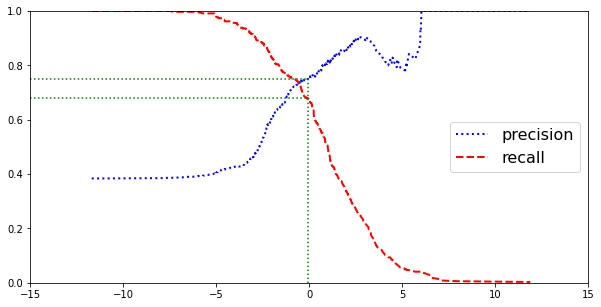

In [148]:
import matplotlib.pyplot as plt
precision_75_threshold = thresholds[np.argmax(precision >= 0.75)]
recall_75_threshold = recalls[np.argmax(precision >= 0.75)]
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], 'b:', label="precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], 'r--', label="recall", linewidth=2)
plt.plot([-15, precision_75_threshold], [0.75, 0.75], 'g:')
plt.plot([-15, precision_75_threshold], [recall_75_threshold, recall_75_threshold], 'g:')
plt.plot([precision_75_threshold, precision_75_threshold], [0, 0.75], 'g:')
plt.legend(loc='center right', fontsize=16)
plt.axis([-15,15,0.0,1])
plt.show()

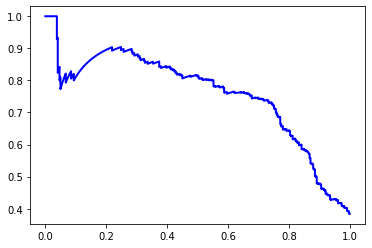

In [149]:
plt.plot(recall, precision, 'b-', linewidth=2)
#plt.axis([0.4, 1, 0, 1])
plt.show()

In [150]:
precision_75_threshold

-0.05381132275078099

In [151]:
train_75_pred_y = scores_y >= precision_75_threshold
precision_score(y, train_75_pred_y)

0.7508090614886731

In [152]:
recall_score(y, train_75_pred_y)

0.6783625730994152

In [153]:
f1_score(y,train_75_pred_y)

0.7127496159754224

In [179]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y, scores_y)

## Random Forest Classifier

In [180]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X,y)
forest_clf.predict(X[:5])

array([0, 1, 1, 1, 0])

In [181]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X, y, cv=3, scoring="accuracy")

array([0.76767677, 0.8047138 , 0.79461279])

In [182]:
pred_forest_y = cross_val_predict(forest_clf, X, y, cv=3, method="predict_proba")

In [183]:
from sklearn.metrics import roc_curve
scores_y = pred_forest_y[:, 1]
fpr, tpr, thresholds = roc_curve(y, scores_y)

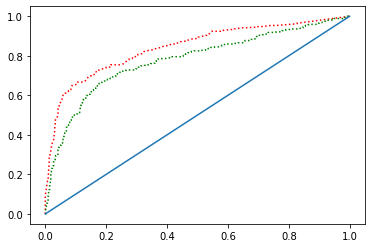

In [184]:
plt.plot(fpr, tpr, 'r:', label="RFC")
plt.plot(fpr_sgd, tpr_sgd, 'g:', label="SGD")
plt.plot([0,1], [0, 1])

In [186]:
pred_y = forest_clf.predict(X)
precision_score(y, pred_y)

0.990909090909091

In [187]:
recall_score(y, pred_y)

0.956140350877193

In [188]:
f1_score(y, pred_y)

0.9732142857142858

Sheeesh, Random forest classifier is bussin!!!